<a href="https://colab.research.google.com/github/LucasMirandaVS/Exerc-cios_Python/blob/main/Analise_de_dados_com_Pandas_e_Numpy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando os pacotes e gerando os dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Vou gerar alguns dados para fazer a análise
# São dados simulando notas escolares

np.random.seed(10)
# quantidade de observações
n = 100

escolaridade = ['Médio Completo', 'Médio Incompleto', 'Superior Completo', 'Superior Incompleto']

cidades = ['Teresópolis', 'Petrópolis', 'Nova Friburgo', 'Magé', 'Rio de Janeiro',
           'Guapimirim', 'Seropédica']

sexo = ['Masculino', 'Feminino']

# dicionário com dados
data = {
    'Id': np.arange(1, n+1),
    'Idade': np.random.randint(25, 75, size = n),
    'Renda': np.random.randint(1_500, 15_000, size = n),
    'Sexo': np.random.choice(sexo, size = n),
    'Escolaridade': np.random.choice(escolaridade, size = n),
    'Cidade': np.random.choice(cidades, size = n)
}

df = pd.DataFrame(data)

In [3]:
df

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,1,34,13749,Masculino,Superior Completo,Magé
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo
2,3,40,2414,Masculino,Médio Completo,Petrópolis
3,4,25,3039,Masculino,Médio Incompleto,Seropédica
4,5,74,4345,Feminino,Superior Incompleto,Petrópolis
...,...,...,...,...,...,...
95,96,67,2704,Masculino,Médio Completo,Magé
96,97,70,8616,Feminino,Médio Incompleto,Rio de Janeiro
97,98,68,7328,Feminino,Médio Incompleto,Guapimirim
98,99,58,7802,Feminino,Superior Incompleto,Seropédica


## Sumarizando os dados e analisando

In [4]:
df[['Id', 'Idade', 'Cidade']]

,Id,Idade,Cidade
0,1,34,Magé
1,2,61,Nova Friburgo
2,3,40,Petrópolis
3,4,25,Seropédica
4,5,74,Petrópolis
...,...,...,...
95,96,67,Magé
96,97,70,Rio de Janeiro
97,98,68,Guapimirim
98,99,58,Seropédica


In [5]:
# criando uma versão(máscara) a partir da qual iremos gerar algumas medidas estatísticas
df_mask = df[['Idade', 'Renda']]

In [6]:
  #Verificando a quantidade de dados não nulo em cada coluna
df.count()

Id              100
Idade           100
Renda           100
Sexo            100
Escolaridade    100
Cidade          100
dtype: int64

In [7]:
# valor mínimo em cada coluna
df_mask.min()

Idade      25
Renda    1912
dtype: int64

In [8]:
# valor maximo de cada coluna
df_mask.max()

Idade       74
Renda    14935
dtype: int64

In [9]:
# média dos valores em cada coluna
df_mask.mean()

Idade      49.77
Renda    7867.08
dtype: float64

In [10]:
# variância dos valores em cada coluna
df_mask.var()

Idade    1.875930e+02
Renda    1.439246e+07
dtype: float64

In [11]:
# desvio padrão dos valores em cada coluna
df_mask.std()

Idade      13.696461
Renda    3793.739204
dtype: float64

In [12]:
# desvio médio absoluto dos valores em cada coluna
df_mask.mad()

Idade      11.5408
Renda    3196.7648
dtype: float64

In [13]:
# mediana dos valores em cada coluna
df_mask.median()

Idade      49.0
Renda    7489.0
dtype: float64

In [14]:
# moda dos valores em cada coluna
df.Cidade.mode()

0    Petrópolis
dtype: object

In [15]:
df.Escolaridade.mode()

0    Superior Incompleto
dtype: object

In [16]:
df.Sexo.mode()

0    Masculino
dtype: object

In [17]:
df.Idade.mode()

0    49
dtype: int64

In [18]:
# soma da renda de todos os clientes
df.Renda.sum()

786708

In [19]:
# soma cumulativa da renda
df.Renda.cumsum()

0      13749
1      23094
2      25508
3      28547
4      32892
       ...  
95    760456
96    769072
97    776400
98    784202
99    786708
Name: Renda, Length: 100, dtype: int64

In [20]:
# quartis de renda (Q1 e Q3)
df.Renda.quantile([0.25, 0.75])

0.25     4977.0
0.75    10839.5
Name: Renda, dtype: float64

In [21]:
# covariância: associação entre variáveis quantitativas
df_mask.cov()

,Idade,Renda
Idade,187.59303,-2.010941e+03
Renda,-2010.94101,1.439246e+07


In [22]:
# Agora a correlação
df_mask.corr()

,Idade,Renda
Idade,1.000000,-0.038701
Renda,-0.038701,1.000000


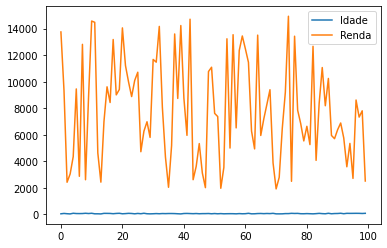

In [23]:
# Visualizando o df mascara
df_mask.plot();

# Manipulando e ordenando

In [24]:
# cria uma cópia dos dados
data = df.copy()

In [25]:
# renomeia outras colunas
new_cols = {'Id': 'id',
            'Renda': 'renda_cliente',
            'Escolaridade': 'grau_escolaridade'}

data.rename(columns = new_cols)

,id,Idade,renda_cliente,Sexo,grau_escolaridade,Cidade
0,1,34,13749,Masculino,Superior Completo,Magé
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo
2,3,40,2414,Masculino,Médio Completo,Petrópolis
3,4,25,3039,Masculino,Médio Incompleto,Seropédica
4,5,74,4345,Feminino,Superior Incompleto,Petrópolis
...,...,...,...,...,...,...
95,96,67,2704,Masculino,Médio Completo,Magé
96,97,70,8616,Feminino,Médio Incompleto,Rio de Janeiro
97,98,68,7328,Feminino,Médio Incompleto,Guapimirim
98,99,58,7802,Feminino,Superior Incompleto,Seropédica


In [26]:
# aplica o método .lower() em cada coluna do DataFrame via função lambda
data.rename(columns = lambda column:column.lower())

,id,idade,renda,sexo,escolaridade,cidade
0,1,34,13749,Masculino,Superior Completo,Magé
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo
2,3,40,2414,Masculino,Médio Completo,Petrópolis
3,4,25,3039,Masculino,Médio Incompleto,Seropédica
4,5,74,4345,Feminino,Superior Incompleto,Petrópolis
...,...,...,...,...,...,...
95,96,67,2704,Masculino,Médio Completo,Magé
96,97,70,8616,Feminino,Médio Incompleto,Rio de Janeiro
97,98,68,7328,Feminino,Médio Incompleto,Guapimirim
98,99,58,7802,Feminino,Superior Incompleto,Seropédica


In [27]:
# ordena os dados pelo nível de escolaridade e sexo
df.sort_values(by = ['Escolaridade', 'Sexo'])

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
8,9,73,2603,Feminino,Médio Completo,Seropédica
12,13,34,4625,Feminino,Médio Completo,Magé
30,31,38,11676,Feminino,Médio Completo,Rio de Janeiro
38,39,37,8735,Feminino,Médio Completo,Rio de Janeiro
40,41,56,8763,Feminino,Médio Completo,Seropédica
...,...,...,...,...,...,...
60,61,42,12476,Masculino,Superior Incompleto,Petrópolis
62,63,32,6276,Masculino,Superior Incompleto,Seropédica
68,69,49,9393,Masculino,Superior Incompleto,Guapimirim
72,73,32,6473,Masculino,Superior Incompleto,Seropédica


In [28]:
# mapeamento dos valores da coluna escolaridade
rank_escolaridade = {
    'Médio Completo': 'A',
    'Médio Incompleto': 'B',
    'Superior Completo': 'C',
    'Superior Incompleto' : 'D'
}

In [29]:
df.Escolaridade.map(rank_escolaridade)

0     C
1     D
2     A
3     B
4     D
     ..
95    A
96    B
97    B
98    D
99    D
Name: Escolaridade, Length: 100, dtype: object

In [30]:
rank_escolaridade_num = {
    'Médio Completo': 1,
    'Médio Incompleto': 2,
    'Superior Completo': 3,
    'Superior Incompleto' : 4
}

In [31]:
# mapeamento dos valores da coluna de Escolaridade ordenados
df.Escolaridade.map(rank_escolaridade_num).sort_values()

76    1
84    1
40    1
36    1
73    1
     ..
51    4
52    4
62    4
81    4
99    4
Name: Escolaridade, Length: 100, dtype: int64

In [32]:
df.sort_values(by = ['Renda', 'Escolaridade']).reset_index(drop = True)

,Id,Idade,Renda,Sexo,Escolaridade,Cidade
0,71,30,1912,Masculino,Médio Incompleto,Nova Friburgo
1,53,49,1959,Feminino,Superior Incompleto,Rio de Janeiro
2,48,48,2006,Feminino,Médio Completo,Petrópolis
3,36,55,2034,Masculino,Médio Incompleto,Guapimirim
4,3,40,2414,Masculino,Médio Completo,Petrópolis
...,...,...,...,...,...,...
95,40,26,14234,Feminino,Médio Incompleto,Magé
96,12,33,14478,Masculino,Superior Completo,Petrópolis
97,11,74,14573,Feminino,Superior Completo,Teresópolis
98,43,52,14711,Feminino,Superior Incompleto,Guapimirim


# Inserindo colunas

In [33]:
# Inserindo uma coluna com ativos financeiros
np.random.seed(7)

ativos = pd.Series(np.random.normal(3_000, 1000, size = n)).round(2)

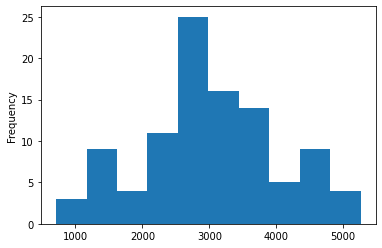

In [34]:
ativos.plot(kind = 'hist');

In [35]:
# cria coluna de ativos
df['ativo'] = ativos
df

,Id,Idade,Renda,Sexo,Escolaridade,Cidade,ativo
0,1,34,13749,Masculino,Superior Completo,Magé,4690.53
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo,2534.06
2,3,40,2414,Masculino,Médio Completo,Petrópolis,3032.82
3,4,25,3039,Masculino,Médio Incompleto,Seropédica,3407.52
4,5,74,4345,Feminino,Superior Incompleto,Petrópolis,2211.08
...,...,...,...,...,...,...,...
95,96,67,2704,Masculino,Médio Completo,Magé,2944.13
96,97,70,8616,Feminino,Médio Incompleto,Rio de Janeiro,5259.95
97,98,68,7328,Feminino,Médio Incompleto,Guapimirim,3869.04
98,99,58,7802,Feminino,Superior Incompleto,Seropédica,2657.88


In [36]:
# cria coluna de renda total
df['renda_total'] = df['Renda']+df['ativo']

In [37]:
# renda média total dos indivíduos
df.loc[:, ['Renda', 'ativo']].mean()

Renda    7867.0800
ativo    3012.0657
dtype: float64

In [38]:
# renda média dos indivíduos
df.loc[:, ['Renda', 'ativo']].mean(axis = 1)

0     9219.765
1     5939.530
2     2723.410
3     3223.260
4     3278.040
        ...   
95    2824.065
96    6937.975
97    5598.520
98    5229.940
99    2517.035
Length: 100, dtype: float64

In [39]:
# renda média (ativos e renda)
renda_media = df.loc[:, ['Renda', 'ativo']].mean(axis = 1)

In [40]:
# posição da coluna 'ativo'
posicao = df.columns.to_list().index('ativo')

In [41]:
# insere a coluna renda_media na posição da coluna 'ativo'
df.insert(posicao, 'renda_média', renda_media )

In [42]:
df.head()

,Id,Idade,Renda,Sexo,Escolaridade,Cidade,renda_média,ativo,renda_total
0,1,34,13749,Masculino,Superior Completo,Magé,9219.765,4690.53,18439.53
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo,5939.530,2534.06,11879.06
2,3,40,2414,Masculino,Médio Completo,Petrópolis,2723.410,3032.82,5446.82
3,4,25,3039,Masculino,Médio Incompleto,Seropédica,3223.260,3407.52,6446.52
4,5,74,4345,Feminino,Superior Incompleto,Petrópolis,3278.040,2211.08,6556.08


# Realizando consultas

In [43]:
# condição simples: filtra os dados a partir do sexo Feminino
df[df.Sexo == 'Feminino']

,Id,Idade,Renda,Sexo,Escolaridade,Cidade,renda_média,ativo,renda_total
4,5,74,4345,Feminino,Superior Incompleto,Petrópolis,3278.040,2211.08,6556.08
6,7,50,2862,Feminino,Superior Completo,Teresópolis,2930.555,2999.11,5861.11
8,9,73,2603,Feminino,Médio Completo,Seropédica,3310.330,4017.66,6620.66
10,11,74,14573,Feminino,Superior Completo,Teresópolis,8473.785,2374.57,16947.57
12,13,34,4625,Feminino,Médio Completo,Magé,4065.150,3505.30,8130.30
13,14,25,2421,Feminino,Superior Completo,Guapimirim,2579.820,2738.64,5159.64
15,16,65,9612,Feminino,Médio Incompleto,Petrópolis,5579.380,1546.76,11158.76
16,17,61,8429,Feminino,Médio Incompleto,Nova Friburgo,5991.790,3554.58,11983.58
17,18,41,13180,Feminino,Superior Incompleto,Petrópolis,8151.940,3123.88,16303.88
26,27,39,4716,Feminino,Médio Incompleto,Magé,3655.385,2594.77,7310.77


In [45]:
# condição 1: sexo feminino
# condição 2: escolaridade ensino superior
# AND: &
df[(df.Sexo == 'Feminino') & (df.Escolaridade == 'Superior Completo')]

,Id,Idade,Renda,Sexo,Escolaridade,Cidade,renda_média,ativo,renda_total
6,7,50,2862,Feminino,Superior Completo,Teresópolis,2930.555,2999.11,5861.11
10,11,74,14573,Feminino,Superior Completo,Teresópolis,8473.785,2374.57,16947.57
13,14,25,2421,Feminino,Superior Completo,Guapimirim,2579.820,2738.64,5159.64
37,38,50,13598,Feminino,Superior Completo,Guapimirim,9029.990,4461.98,18059.98
43,44,43,2606,Feminino,Superior Completo,Seropédica,2426.580,2247.16,4853.16
48,49,55,10764,Feminino,Superior Completo,Nova Friburgo,7016.705,3269.41,14033.41
63,64,36,4929,Feminino,Superior Completo,Petrópolis,4814.270,4699.54,9628.54
71,72,29,2779,Feminino,Superior Completo,Nova Friburgo,2748.180,2717.36,5496.36
80,81,49,6633,Feminino,Superior Completo,Seropédica,5143.855,3654.71,10287.71
85,86,47,11066,Feminino,Superior Completo,Petrópolis,6737.615,2409.23,13475.23


In [46]:
# Outra consulta
# condição 1: sexo masculino
# condição 2: renda>= 7_500
df.loc[(df.Sexo == 'Masculino') & (df.Renda >= 7_500)]

,Id,Idade,Renda,Sexo,Escolaridade,Cidade,renda_média,ativo,renda_total
0,1,34,13749,Masculino,Superior Completo,Magé,9219.765,4690.53,18439.53
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo,5939.530,2534.06,11879.06
5,6,53,9452,Masculino,Médio Completo,Teresópolis,6227.035,3002.07,12454.07
7,8,54,12815,Masculino,Médio Incompleto,Petrópolis,7030.140,1245.28,14060.28
9,10,54,8911,Masculino,Médio Completo,Seropédica,6255.750,3600.50,12511.50
11,12,33,14478,Masculino,Superior Completo,Petrópolis,8653.225,2828.45,17306.45
18,19,61,9005,Masculino,Médio Completo,Magé,6139.730,3274.46,12279.46
19,20,72,9413,Masculino,Superior Incompleto,Rio de Janeiro,5443.240,1473.48,10886.48
20,21,36,14056,Masculino,Médio Completo,Nova Friburgo,9353.350,4650.70,18706.70
21,22,49,11214,Masculino,Superior Incompleto,Petrópolis,7184.170,3154.34,14368.34


In [48]:
# condição 1: escolaridade Ensino Fundamental
# condição 2: escolaridade Ensino Médio
# OR: |
df[(df.Escolaridade == 'Médio Incompleto') | (df.Escolaridade == 'Superior Incompleto')]

,Id,Idade,Renda,Sexo,Escolaridade,Cidade,renda_média,ativo,renda_total
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo,5939.530,2534.06,11879.06
3,4,25,3039,Masculino,Médio Incompleto,Seropédica,3223.260,3407.52,6446.52
4,5,74,4345,Feminino,Superior Incompleto,Petrópolis,3278.040,2211.08,6556.08
7,8,54,12815,Masculino,Médio Incompleto,Petrópolis,7030.140,1245.28,14060.28
14,15,67,6986,Masculino,Superior Incompleto,Teresópolis,4871.625,2757.25,9743.25
15,16,65,9612,Feminino,Médio Incompleto,Petrópolis,5579.380,1546.76,11158.76
16,17,61,8429,Feminino,Médio Incompleto,Nova Friburgo,5991.790,3554.58,11983.58
17,18,41,13180,Feminino,Superior Incompleto,Petrópolis,8151.940,3123.88,16303.88
19,20,72,9413,Masculino,Superior Incompleto,Rio de Janeiro,5443.240,1473.48,10886.48
21,22,49,11214,Masculino,Superior Incompleto,Petrópolis,7184.170,3154.34,14368.34


In [49]:
# condição 1: renda>=8_000
# condição 2: idade>=50
# condição 3: feminino

df[(df.Renda>=8_000) & (df.Idade>=50) & (df.Sexo == 'Feminino')]\
.sort_values(by = ['Idade', 'Renda'])\
.reset_index(drop = True)\
.drop(columns = ['Id'])[['Renda', 'Idade']]\
.query('Idade >= 60')

,Renda,Idade
4,8429,61
5,9612,65
6,8616,70
7,10243,73
8,14573,74


In [50]:
# nega a proposição, pega informações apenas para clientes do gênero masculino
df.loc[~(df.Sexo == 'Feminino')]

,Id,Idade,Renda,Sexo,Escolaridade,Cidade,renda_média,ativo,renda_total
0,1,34,13749,Masculino,Superior Completo,Magé,9219.765,4690.53,18439.53
1,2,61,9345,Masculino,Superior Incompleto,Nova Friburgo,5939.530,2534.06,11879.06
2,3,40,2414,Masculino,Médio Completo,Petrópolis,2723.410,3032.82,5446.82
3,4,25,3039,Masculino,Médio Incompleto,Seropédica,3223.260,3407.52,6446.52
5,6,53,9452,Masculino,Médio Completo,Teresópolis,6227.035,3002.07,12454.07
7,8,54,12815,Masculino,Médio Incompleto,Petrópolis,7030.140,1245.28,14060.28
9,10,54,8911,Masculino,Médio Completo,Seropédica,6255.750,3600.50,12511.50
11,12,33,14478,Masculino,Superior Completo,Petrópolis,8653.225,2828.45,17306.45
14,15,67,6986,Masculino,Superior Incompleto,Teresópolis,4871.625,2757.25,9743.25
18,19,61,9005,Masculino,Médio Completo,Magé,6139.730,3274.46,12279.46


In [51]:
# pega apenas os clientes cuja a escolaridade seja diferente de Ensino Médio incompleto
df.query("Escolaridade != 'Médio Incompleto'")['Escolaridade'].unique()

array(['Superior Completo', 'Superior Incompleto', 'Médio Completo'],
      dtype=object)

Por se tratar de dados gerados de forma aleatória, não cabe muito mais análise do que isso ai. Mas do ponto de vista da prática foi um projeto muito proveitoso!